# Airline

### Import Liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

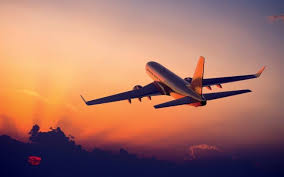

### Loading the Dataset

In [2]:
df= pd.read_csv(r"C:\Users\Nikhil Nandugade\Downloads\Airline Dataset.csv\Airline Dataset.csv")

### Basic Checks

In [3]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [4]:
df.tail()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
98614,58454,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12/11/2022,HAA,Gareth Mugford,Cancelled
98615,22028,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Kasey Benedict,Cancelled
98616,61732,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,9/10/2022,ABC,Darrin Lucken,On Time
98617,19819,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Gayle Lievesley,Cancelled
98618,14485,Wilhelmine,Touret,Female,10,Poland,Yoshkar-Ola Airport,RU,Russian Federation,EU,Europe,4/16/2022,JOK,Wilhelmine Touret,Delayed


In [5]:
pd.DataFrame(list(df)) 

,0
0,Passenger ID
1,First Name
2,Last Name
3,Gender
4,Age
5,Nationality
6,Airport Name
7,Airport Country Code
8,Country Name
9,Airport Continent


### Domain Analysis

***Dataset Glossary (Column-wise)***

Passenger ID - Unique identifier for each passenger

First Name - First name of the passenger

Last Name - Last name of the passenger

Gender - Gender of the passenger

Age - Age of the passenger

Nationality - Nationality of the passenger

Airport Name - Name of the airport where the passenger boarded

Airport Country Code - Country code of the airport's location

Country Name - Name of the country the airport is located in

Airport Continent - Continent where the airport is situated

Continents - Continents involved in the flight route

Departure Date - Date when the flight departed

Arrival Airport - Destination airport of the flight

Pilot Name - Name of the pilot operating the flight

Flight Status - Current status of the flight (e.g., on-time, delayed, canceled)

In [6]:
df.shape

(98619, 15)

In [7]:
df.size

1479285

In [8]:
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

### Check for Information & Data type 


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Passenger ID          98619 non-null  int64         
 1   First Name            98619 non-null  object        
 2   Last Name             98619 non-null  object        
 3   Gender                98619 non-null  object        
 4   Age                   98619 non-null  int64         
 5   Nationality           98619 non-null  object        
 6   Airport Name          98619 non-null  object        
 7   Airport Country Code  98619 non-null  object        
 8   Country Name          98619 non-null  object        
 9   Airport Continent     98619 non-null  object        
 10  Continents            98619 non-null  object        
 11  Departure Date        98619 non-null  datetime64[ns]
 12  Arrival Airport       98619 non-null  object        
 13  Pilot Name      

In [10]:
df.describe(include=["O"])  #### Statistical parameters of Categorical columns

,First Name,Last Name,Gender,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Arrival Airport,Pilot Name,Flight Status
count,98619,98619,98619,98619,98619,98619,98619,98619,98619,98619,98619,98619
unique,8437,41658,2,240,9062,235,235,6,6,9024,98610,3
top,Gale,Dyball,Male,China,San Pedro Airport,US,United States,NAM,North America,0,Ertha Feldbaum,Cancelled
freq,37,17,49598,18317,43,22104,22104,32033,32033,873,2,32942


In [11]:
df.describe()  #### Statistical parameters of Numerical columns

,Passenger ID,Age,Departure Date
count,98619.000000,98619.000000,98619
mean,55168.689522,45.504021,2022-07-01 01:24:51.886959104
min,10000.000000,1.000000,2022-01-01 00:00:00
25%,32608.000000,23.000000,2022-04-01 00:00:00
50%,55338.000000,46.000000,2022-07-01 00:00:00
75%,77695.000000,68.000000,2022-09-30 00:00:00
max,99999.000000,90.000000,2022-12-30 00:00:00
std,25985.443696,25.929849,NaN


### Missing value Treatment

In [12]:
df.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

***Dataset doesn't have any null values***

# Explorartory Data Analysis (EDA)

## 1) Ratio between Male Travellers and Female Travellers


In [ ]:
df["Gender"].unique()  ### check unique values

In [ ]:
Gender=df['Gender'].value_counts().reset_index()
Gender

***1)Total number of Males->49,598***

***2)Total number of Females->49,021***

In [ ]:
fig=px.bar(Gender,x='Gender',y='count',color='Gender',color_discrete_sequence=px.colors.sequential.Agsunset,template = 'plotly_dark')
fig.update_layout(title_text='Number of Males & Females', xaxis_title='GENDER', yaxis_title='COUNT')
fig.show()

In [ ]:
# Ratio between Male Travellers and Female Travellers

Travl_Ratio =  df['Gender'].value_counts()
Travl_Ratio = pd.DataFrame({'Gender': Travl_Ratio.index, 'Count': Travl_Ratio.values})

# Plotting a Donut Chart that represents the travelers ratio 

fig2 = px.pie(Travl_Ratio, values='Count', names='Gender', hole=0.5)
fig2.update_layout(title="Traveller's Ratio Male vs Female ")
fig2.show()

***Number of males and females in the dataset are comparable.***

## Nationality

In [ ]:
df['Nationality'].unique()

In [ ]:
df['Nationality'].nunique()

***There are a total of 240 Nationalities present in the dataset.***

## 2) Top 10 nationality with the heighest number of air travellers ?

In [ ]:
nation_count=df['Nationality'].value_counts().reset_index()
nation_count

In [ ]:
top_10_countries=nation_count.nlargest(10,'count')
top_10_countries.reset_index()
top_10_countries

In [ ]:
# Plotting Highest number of Passanger Nationalities
px.bar(top_10_countries,x='Nationality',y='count',color='Nationality',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

***Top 10 Nationalities are:***

***1)China
2)Indonesia
3)Russia
4)Philippines
5)Brazil
6)Portugal
7)Poland
8)France
9)Sweden
10)United States***

In [ ]:
# Ratio of Visitors per Nations/Country of Origin

Visitors_per_nations = df['Nationality'].value_counts()
Visitors_per_nations_1 = Visitors_per_nations.head(20).reset_index()
Visitors_per_nations_1.columns = ['Country', 'Count']  # Rename columns for clarity
Visitors_per_nations_1.sort_values(by='Count', ascending=False, inplace=True)  # Sort by count

# Plotting a pie chart to represent the nationality ratio (TOP 20)
fig7 = px.pie(Visitors_per_nations_1, values='Count', names='Country', hole=0.5, title='Nationality Ratio (TOP 20)')
fig7.show()

## 3) Bottom 10 Nationality with the Lowest number of air travellers ?

In [ ]:
lowest_10_countries=nation_count.nsmallest(10,'count')
lowest_10_countries.reset_index()
lowest_10_countries

In [ ]:
# Plotting Lowest number of Passanger Nationalities
px.bar(lowest_10_countries,x='Nationality',y='count',color='Nationality',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

***Bottom 10 Nationality are:***

***1)Jersey
2)Norfolk Island
3)Sint Maarten
4)French Southern Territories
5)Svalbard and Jan Mayen
6)Saint Helena
7)Macao
8)Saint Martin
9)Cook Islands
10)Cocos Islands***

## 4) Age Group Travellers

In [ ]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data = df, x = 'Age', hue = 'Gender', color = 'blue')

In [ ]:
sns.boxplot(df.Age)

***The graph shows the distribution of age for females and males. The female distribution is more spread out than the male distribution, with a peak in the 20-30 age range. The male distribution is more concentrated in the 30-50 age range.***

***What I understand from the graph:***

***The average age of females is lower than the average age of males.***

***There are more females in the younger age groups than males.***

***There are more males in the older age groups than females.***

***The distribution of ages for females is bimodal, meaning that there are two peaks.***

***The distribution of ages for males is unimodal, meaning that there is one peak.***

## 5) Top 10 Airports with most crowd

In [ ]:
df['Airport Name'].unique()

In [ ]:
df['Airport Name'].nunique()

In [ ]:
airport_name=df['Airport Name'].value_counts().reset_index()
airport_name

In [ ]:
top10=airport_name.nlargest(10,'count')
top10

In [ ]:
px.bar(top10,x='count',y='Airport Name',color='Airport Name',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

***Top 10 Airports with most crowd are:***

***1)San Pedro Airport	
2)Santa Maria Airport	
3)Böblingen Flugfeld	
4)Santa Ana Airport
5)San Fernando Airport
6)Mae Hong Son Airport
7)Capital City Airport
8)Cochrane Airport
9)Santa Rosa Airport	
10)Bathurst Airport***

## 6) Bottom 10 Airports with lowest passengers

In [ ]:
bottom10=airport_name.nsmallest(10,'count')
bottom10

In [ ]:
px.bar(bottom10,x='count',y='Airport Name',color='Airport Name',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

***Bottom 10 Airports with lowest passengers are:***

***1)Falcon State Airport		
2)Hiroshima Airport	
3)Camaxilo Airport	
4)Mount Gambier Airport
5)J F Mitchell Airport
6)Kar Kar Airport	
7)Smolensk North Airport
8)San Luis Airport
9)Balıkesir Merkez Airport	
10)Arkalyk North Airport***

## Countries

In [ ]:
country=df['Country Name'].value_counts().reset_index()
country

## 7) Top 10 countries with most number of active flights

In [ ]:
top10_country=country.nlargest(10,'count')
top10_country

In [ ]:
px.bar(top10_country,x='count',y='Country Name',color='Country Name',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

***Top 10 countries with most number of active flights are:***

***1)United States		
2)Australia	
3)Canada	
4)Brazil
5)Papua New Guinea	
6)China	
7)Indonesia	
8)Russian Federation
9)Colombia
10)India***

## 8) Bottom 10 countries with most number of active flights

In [ ]:
bottom10_country=country.nsmallest(10,'count')
bottom10_country

In [ ]:
px.bar(bottom10_country,x='count',y='Country Name',color='Country Name',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

***Bottom 10 countries with most number of active flights are:***

***1)Jersey		
2)Palau
3)Andorra	
4)Monaco	
5)Nauru	
6)Cocos (Keeling) Islands	
7)Brunei Darussalam	
8)Luxembourg
9)Aruba
10)Gibraltar***

## 9) Most active Continents

In [ ]:
continent=df['Continents'].value_counts().reset_index()
continent

In [ ]:
px.bar(continent,x='count',y='Continents',color='Continents',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

***Most active Continents are:***

***1)North America		
2)Asia
3)Oceania	
4)Europe	
5)Africa	
6)South America***

## Arrival Airports

In [ ]:
airport=df['Arrival Airport'].value_counts().reset_index()
airport

## 10) Top 10 Airport to recieve most number of travellers

In [ ]:
top=airport.nlargest(10,'count')
top

In [ ]:
px.bar(top,x='count',y='Arrival Airport',color='Arrival Airport',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

***Top 10 Airport to recieve most number of travellers are:***

***1)0		
2)JNB
3)PHM	
4)MPT	
5)PCO	
6)YTY	
7)ZRZ	
8)DZI
9)AHT
10)GTF***

## 11) Bottom 10 Airport to recieve most number of travellers

In [ ]:
bottom=airport.nsmallest(10,'count')
bottom

In [ ]:
px.bar(bottom,x='count',y='Arrival Airport',color='Arrival Airport',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'plotly_dark')

***Bottom 10 Airport to recieve most number of travellers are:***

***1)FAL		
2)HIJ
3)MGB	
4)JUB	
5)KRX	
6)AYK	
7)BZI	
8)LNX
9)CXM
10)IPI***

## 12) Overall Flight Status

In [ ]:
status=df['Flight Status'].value_counts().reset_index()
status

In [ ]:
px.bar(status,x='Flight Status',y='count',color='Flight Status',color_discrete_sequence=px.colors.sequential.Viridis,template = 'plotly_dark')

***We can See - Cancelled > On Time > Delayed***

### Continent =>  North America

In [ ]:
N_America=df[df['Continents']=='North America']
status_na=N_America['Flight Status'].value_counts().reset_index()
status_na

### Continent => Asia


In [ ]:
asia=df[df['Continents']=='Asia']
status_as=asia['Flight Status'].value_counts().reset_index()
status_as

### Continent => Oceania

In [ ]:
oceania=df[df['Continents']=='Oceania']
status_oc=asia['Flight Status'].value_counts().reset_index()
status_oc

### Continent => Europe

In [ ]:
eu=df[df['Continents']=='Europe']
status_eu=eu['Flight Status'].value_counts().reset_index()
status_eu

### Continent => Africa

In [ ]:
af=df[df['Continents']=='Africa']
status_af=af['Flight Status'].value_counts().reset_index()
status_af

### Continent => South America

In [ ]:
sa=df[df['Continents']=='South America']
status_sa=sa['Flight Status'].value_counts().reset_index()
status_sa

***From here we can say that***

***Most Cancelled Flights are from North America***

***Most delayed are from North america***

***Most On Time are from North america***

## 13) On Time Flight in Max Airport Name

In [ ]:
on_t= df.loc[df['Flight Status'] == 'On Time', 'Airport Name'].value_counts().nlargest(5).reset_index().rename(columns={'index': 'Airport Name','Airport Name':'count1'})
on_t

In [ ]:
fig = sns.barplot(on_t, y='count1', x='count',palette ='plasma')


***On Time Flight in Max Airport Name are:***

***1)San Pedro Airport		
2)Santa Ana Airport
3)Mercer County Airport	
4)OR Tambo International Airport
5)Böblingen Flugfeld***

## 14) Cancelled Flight in Max Airport Name

In [ ]:
can = df.loc[df['Flight Status'] == 'Cancelled', 'Airport Name'].value_counts().nlargest(5).reset_index().rename(columns={'index': 'Airport Name','Airport Name':'count1'})
can

In [ ]:
fig = sns.barplot(can, y='count1', x='count')

***Cancelled Flight in Max Airport Name are:***

***1)Yangzhou Taizhou Airport		
2)Böblingen Flugfeld
3)Mae Hong Son Airport
4)Kiunga Airport
5)Danilo Atienza Air Base***

## 15) Delayed Flight in Max Airport Name

In [ ]:
dely = df.loc[df['Flight Status'] == 'Delayed', 'Airport Name'].value_counts().nlargest(5).reset_index().rename(columns={'index': 'Airport Name','Airport Name':'count1'})
dely

In [ ]:
fig = sns.barplot(dely, y='count1', x='count',palette ='plasma')


***Delayed Flight in Max Airport Name are:***

***1)Santa Maria Airport		
2)Santa Rosa Airport
3)San Pedro Airport
4)Santa Ana Airport
5)Visby Airport***

## 16) Top 10 Total number of Pilots per country

In [ ]:
Pilot_df = df[['Country Name', 'Pilot Name']]
pilot_pivot = pd.pivot_table(Pilot_df, index=['Country Name'], aggfunc='count')
pilot_pivot.rename(columns={'Pilot Name':'Pilot Count'}, inplace=True)
pilot_pivot = pilot_pivot.reset_index()
pilot_pivot.sort_values(by='Pilot Count', ascending=False, inplace=True)
pilot_pivot.head(10)

In [ ]:
fig3 = px.bar(pilot_pivot.head(10), x='Pilot Count', y='Country Name',
              title='Pilot Count by Country')
fig3.show()

***Top 10 Total number of Pilots per country are:***

***1)United States		
2)Australia
3)Canada
4)Brazil
5)Papua New Guinea
6)China
7)Indonesia
8)Russian Federation
9)Colombia
10)India***

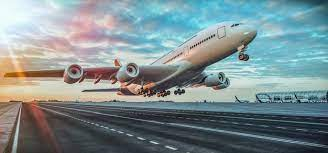

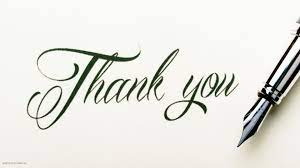